In [541]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sodapy import Socrata

client = Socrata("data.cityofnewyork.us", None)

results = client.get("h9gi-nx95", limit=2000)

data = pd.DataFrame.from_records(results)

In [542]:
data.head()

,crash_date,crash_time,on_street_name,off_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,collision_id,vehicle_type_code1,vehicle_type_code2,borough,zip_code,latitude,longitude,location,cross_street_name,contributing_factor_vehicle_3,vehicle_type_code_3,contributing_factor_vehicle_4,vehicle_type_code_4,contributing_factor_vehicle_5,vehicle_type_code_5
0,2021-09-11T00:00:00.000,2:39,WHITESTONE EXPRESSWAY,20 AVENUE,2,0,0,0,0,0,2,0,Aggressive Driving/Road Rage,Unspecified,4455765,Sedan,Sedan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-03-26T00:00:00.000,11:45,QUEENSBORO BRIDGE UPPER,NaN,1,0,0,0,0,0,1,0,Pavement Slippery,NaN,4513547,Sedan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-06-29T00:00:00.000,6:55,THROGS NECK BRIDGE,NaN,0,0,0,0,0,0,0,0,Following Too Closely,Unspecified,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-09-11T00:00:00.000,9:35,NaN,NaN,0,0,0,0,0,0,0,0,Unspecified,NaN,4456314,Sedan,NaN,BROOKLYN,11208,40.667202,-73.8665,"{'latitude': '40.667202', 'longitude': '-73.86...",1211 LORING AVENUE,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-12-14T00:00:00.000,8:13,SARATOGA AVENUE,DECATUR STREET,0,0,0,0,0,0,0,0,NaN,NaN,4486609,NaN,NaN,BROOKLYN,11233,40.683304,-73.917274,"{'latitude': '40.683304', 'longitude': '-73.91...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [543]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   crash_date                     2000 non-null   object
 1   crash_time                     2000 non-null   object
 2   on_street_name                 1471 non-null   object
 3   off_street_name                932 non-null    object
 4   number_of_persons_injured      2000 non-null   object
 5   number_of_persons_killed       2000 non-null   object
 6   number_of_pedestrians_injured  2000 non-null   object
 7   number_of_pedestrians_killed   2000 non-null   object
 8   number_of_cyclist_injured      2000 non-null   object
 9   number_of_cyclist_killed       2000 non-null   object
 10  number_of_motorist_injured     2000 non-null   object
 11  number_of_motorist_killed      2000 non-null   object
 12  contributing_factor_vehicle_1  1995 non-null   object
 13  con

In [544]:
data.isnull().sum()

crash_date                          0
crash_time                          0
on_street_name                    529
off_street_name                  1068
number_of_persons_injured           0
number_of_persons_killed            0
number_of_pedestrians_injured       0
number_of_pedestrians_killed        0
number_of_cyclist_injured           0
number_of_cyclist_killed            0
number_of_motorist_injured          0
number_of_motorist_killed           0
contributing_factor_vehicle_1       5
contributing_factor_vehicle_2     433
collision_id                        0
vehicle_type_code1                 24
vehicle_type_code2                651
borough                           700
zip_code                          701
latitude                          148
longitude                         148
location                          148
cross_street_name                1471
contributing_factor_vehicle_3    1801
vehicle_type_code_3              1821
contributing_factor_vehicle_4    1944
vehicle_type

In [545]:
data.describe()

,crash_date,crash_time,on_street_name,off_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,collision_id,vehicle_type_code1,vehicle_type_code2,borough,zip_code,latitude,longitude,location,cross_street_name,contributing_factor_vehicle_3,vehicle_type_code_3,contributing_factor_vehicle_4,vehicle_type_code_4,contributing_factor_vehicle_5,vehicle_type_code_5
count,2000,2000,1471,932,2000,2000,2000,2000,2000,2000,2000,2000,1995,1567,2000,1976,1349,1300,1299,1852,1852,1852,529,199,179,56,52,13,12
unique,132,760,774,675,8,2,3,2,3,2,8,2,38,19,2000,47,40,5,167,1757,1753,1786,525,6,7,2,6,1,3
top,2021-04-14T00:00:00.000,0:00,BELT PARKWAY,3 AVENUE,0,0,0,0,0,0,0,0,Unspecified,Unspecified,4455765,Sedan,Sedan,BROOKLYN,11207,0.0000000,0.0000000,"{'latitude': '0.0', 'longitude': '0.0', 'human...",24 EAST 116 STREET,Unspecified,Sedan,Unspecified,Sedan,Unspecified,Station Wagon/Sport Utility Vehicle
freq,256,40,30,13,1342,1993,1865,1995,1927,1999,1568,1999,502,1378,1,991,616,461,37,10,10,10,2,192,99,55,29,13,6


In [546]:
data.shape

(2000, 29)

In [547]:
# Changing column names to the ones I want to use

new_cols_dict = {
  'crash_date' : 'crash_date',
  'crash_time' : 'crash_time',
  'on_street_name' : 'on_street_name',
  'off_street_name' : 'off_street_name',
  'number_of_persons_injured' : 'persons_injured',
  'number_of_persons_killed' : 'persons_killed',
  'number_of_pedestrians_injured' : 'pedestrians_injured',
  'number_of_pedestrians_killed' : 'pedestrians_killed',
  'number_of_cyclist_injured' : 'cyclist_injured',
  'number_of_cyclist_killed' : 'cyclist_killed',
  'number_of_motorist_injured' : 'motorist_injured',
  'number_of_motorist_killed' : 'motorist_killed',
  'contributing_factor_vehicle_1' : 'contributing_factor_vehicle_1',
  'contributing_factor_vehicle_2' : 'contributing_factor_vehicle_2',
  'collision_id' : 'collision_id',
  'vehicle_type_code1' : 'vehicle_type_code_1',
  'vehicle_type_code2' : 'vehicle_type_code_2',
  'borough' : 'borough',
  'zip_code' : 'zip_code',
  'latitude' : 'latitude',
  'longitude' : 'longitude',
  'location' : 'location',
  'cross_street_name' : 'cross_street_name',
  'contributing_factor_vehicle_3' : 'contributing_factor_vehicle_3',
  'vehicle_type_code_3' : 'vehicle_type_code_3',
  'contributing_factor_vehicle_4' : 'contributing_factor_vehicle_4',
  'vehicle_type_code_4' : 'vehicle_type_code_4',
  'contributing_factor_vehicle_5' : 'contributing_factor_vehicle_5',
  'vehicle_type_code_5' : 'vehicle_type_code_5'
}

data.rename(new_cols_dict, axis=1, inplace=True)
 

In [548]:
data.columns

Index(['crash_date', 'crash_time', 'on_street_name', 'off_street_name',
       'persons_injured', 'persons_killed', 'pedestrians_injured',
       'pedestrians_killed', 'cyclist_injured', 'cyclist_killed',
       'motorist_injured', 'motorist_killed', 'contributing_factor_vehicle_1',
       'contributing_factor_vehicle_2', 'collision_id', 'vehicle_type_code_1',
       'vehicle_type_code_2', 'borough', 'zip_code', 'latitude', 'longitude',
       'location', 'cross_street_name', 'contributing_factor_vehicle_3',
       'vehicle_type_code_3', 'contributing_factor_vehicle_4',
       'vehicle_type_code_4', 'contributing_factor_vehicle_5',
       'vehicle_type_code_5'],
      dtype='object')

In [549]:
# dropping unwanted columns for data exploration

columns_to_drop = ['cross_street_name', 'contributing_factor_vehicle_3', 'contributing_factor_vehicle_4', 'contributing_factor_vehicle_5', 'vehicle_type_code_3', 'vehicle_type_code_4', 'vehicle_type_code_5']

data.drop(columns=columns_to_drop, inplace=True)

In [550]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   crash_date                     2000 non-null   object
 1   crash_time                     2000 non-null   object
 2   on_street_name                 1471 non-null   object
 3   off_street_name                932 non-null    object
 4   persons_injured                2000 non-null   object
 5   persons_killed                 2000 non-null   object
 6   pedestrians_injured            2000 non-null   object
 7   pedestrians_killed             2000 non-null   object
 8   cyclist_injured                2000 non-null   object
 9   cyclist_killed                 2000 non-null   object
 10  motorist_injured               2000 non-null   object
 11  motorist_killed                2000 non-null   object
 12  contributing_factor_vehicle_1  1995 non-null   object
 13  con

In [551]:
# Changing necessary column objects to numeric/date values

data['crash_date'] = pd.to_datetime(data['crash_date'])

numeric_columns = ['persons_injured', 'persons_killed', 'pedestrians_injured', 'pedestrians_killed',
                    'cyclist_injured', 'cyclist_killed', 'motorist_injured', 'motorist_killed', 'zip_code',
                    'latitude', 'longitude']

data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

In [552]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   crash_date                     2000 non-null   datetime64[ns]
 1   crash_time                     2000 non-null   object        
 2   on_street_name                 1471 non-null   object        
 3   off_street_name                932 non-null    object        
 4   persons_injured                2000 non-null   int64         
 5   persons_killed                 2000 non-null   int64         
 6   pedestrians_injured            2000 non-null   int64         
 7   pedestrians_killed             2000 non-null   int64         
 8   cyclist_injured                2000 non-null   int64         
 9   cyclist_killed                 2000 non-null   int64         
 10  motorist_injured               2000 non-null   int64         
 11  motorist_killed  

In [553]:
data.head()

,crash_date,crash_time,on_street_name,off_street_name,persons_injured,persons_killed,pedestrians_injured,pedestrians_killed,cyclist_injured,cyclist_killed,motorist_injured,motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,collision_id,vehicle_type_code_1,vehicle_type_code_2,borough,zip_code,latitude,longitude,location
0,2021-09-11,2:39,WHITESTONE EXPRESSWAY,20 AVENUE,2,0,0,0,0,0,2,0,Aggressive Driving/Road Rage,Unspecified,4455765,Sedan,Sedan,NaN,NaN,NaN,NaN,NaN
1,2022-03-26,11:45,QUEENSBORO BRIDGE UPPER,NaN,1,0,0,0,0,0,1,0,Pavement Slippery,NaN,4513547,Sedan,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-06-29,6:55,THROGS NECK BRIDGE,NaN,0,0,0,0,0,0,0,0,Following Too Closely,Unspecified,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN,NaN,NaN
3,2021-09-11,9:35,NaN,NaN,0,0,0,0,0,0,0,0,Unspecified,NaN,4456314,Sedan,NaN,BROOKLYN,11208.0,40.667202,-73.866500,"{'latitude': '40.667202', 'longitude': '-73.86..."
4,2021-12-14,8:13,SARATOGA AVENUE,DECATUR STREET,0,0,0,0,0,0,0,0,NaN,NaN,4486609,NaN,NaN,BROOKLYN,11233.0,40.683304,-73.917274,"{'latitude': '40.683304', 'longitude': '-73.91..."


What is the average percentage of a person getting injured in a car accident?

In [554]:
data.columns

Index(['crash_date', 'crash_time', 'on_street_name', 'off_street_name',
       'persons_injured', 'persons_killed', 'pedestrians_injured',
       'pedestrians_killed', 'cyclist_injured', 'cyclist_killed',
       'motorist_injured', 'motorist_killed', 'contributing_factor_vehicle_1',
       'contributing_factor_vehicle_2', 'collision_id', 'vehicle_type_code_1',
       'vehicle_type_code_2', 'borough', 'zip_code', 'latitude', 'longitude',
       'location'],
      dtype='object')

In [555]:
injured_percentages = []

total_persons_injured = data['persons_injured'].sum()
total_pedestrians_injured = data['pedestrians_injured'].sum()
total_cyclist_injured = data['cyclist_injured'].sum()
total_motorist_injured = data['motorist_injured'].sum()
total_persons = data['persons_injured'].count()

injured_percentages.append((total_persons_injured / total_persons) * 100)  # average percentage of persons' injury
injured_percentages.append((total_pedestrians_injured / total_persons) * 100)  # average percentage of pedestrians' injury
injured_percentages.append((total_cyclist_injured / total_persons) * 100)  # average percentage of cyclists' injury
injured_percentages.append((total_motorist_injured / total_persons) * 100)  # average percentage of motorists' injury

print(injured_percentages) 
# [persons,pedestrians,cyclists,motorists]

[44.15, 6.950000000000001, 3.75, 32.15]


What is the average percentage of a person getting killed in a car accident? 

In [556]:
death_percentages = []

total_persons_killed = data['persons_killed'].sum()
total_pedestrians_killed = data['pedestrians_killed'].sum()
total_cyclist_killed = data['cyclist_killed'].sum()
total_motorist_killed = data['motorist_killed'].sum()
total_persons = data['persons_killed'].count()

death_percentages.append((total_persons_killed / total_persons) * 100)  # average percentage of persons killed
death_percentages.append((total_pedestrians_killed / total_persons) * 100)  # average percentage of pedestrians killed
death_percentages.append((total_cyclist_killed / total_persons) * 100)  # average percentage of cyclists killed
death_percentages.append((total_motorist_killed / total_persons) * 100)  # average percentage of motorists killed

print(death_percentages)
 
# [persons,pedestrians,cyclists,motorists]

[0.35000000000000003, 0.25, 0.05, 0.05]


Total injured/death percentages

In [557]:
total_injured = total_persons_injured + total_pedestrians_injured + total_cyclist_injured + total_motorist_injured
total_injured_percentage = (total_injured / total_persons) * 100

print(total_injured_percentage)

total_deaths = total_persons_killed + total_pedestrians_killed + total_cyclist_killed + total_motorist_killed

total_deaths_percentage = (total_deaths / total_persons) * 100

print(total_deaths_percentage)

# injured/deaths are mutually exclusive

87.0
0.7000000000000001


What times do car accidents most frequently occur?

In [558]:
# Creating a metric for crash_times: [early_morning, morning, afternoon, evening, night, late_night]

# Changing crash_time object to date temporarily
data['crash_time'] = pd.to_datetime(data['crash_time'], format='%H:%M', errors='coerce')

# Getting the hour only from crash_time
data['crash_hour'] = data['crash_time'].dt.hour

time_conditions = [
  (data['crash_hour'] >= 0) & (data['crash_hour'] < 5), # late_night 12am - 5 am
  (data['crash_hour'] >= 5) & (data['crash_hour'] < 12), # morning 5am - 12pm
  (data['crash_hour'] >= 12) & (data['crash_hour'] < 17), # afternoon 12pm - 5pm
  (data['crash_hour'] >= 17) & (data['crash_hour'] < 21), # evening 5pm - 9pm
  (data['crash_hour'] >= 21) & (data['crash_hour'] <= 24) # night 9pm - 12am
]

time_categories = ['morning (5am-12pm)', 'afternoon (12pm-5pm)', 'evening (5pm-9pm)', 'night (9pm-12am)', 'late night (12am-5am)']

data['crash_time_category'] = pd.Categorical(np.select(time_conditions, time_categories, default=''), categories=time_categories)


# drop unused columns
data = data.drop(['crash_hour'], axis=1)

# revert crash_date back to object so it doesn't have a random mm/dd/yr included

data['crash_time'] = data['crash_time'].dt.strftime('%H:%M')


In [559]:
# checking for newly added column, crash_time_category exists
data.head()

,crash_date,crash_time,on_street_name,off_street_name,persons_injured,persons_killed,pedestrians_injured,pedestrians_killed,cyclist_injured,cyclist_killed,motorist_injured,motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,collision_id,vehicle_type_code_1,vehicle_type_code_2,borough,zip_code,latitude,longitude,location,crash_time_category
0,2021-09-11,02:39,WHITESTONE EXPRESSWAY,20 AVENUE,2,0,0,0,0,0,2,0,Aggressive Driving/Road Rage,Unspecified,4455765,Sedan,Sedan,NaN,NaN,NaN,NaN,NaN,morning (5am-12pm)
1,2022-03-26,11:45,QUEENSBORO BRIDGE UPPER,NaN,1,0,0,0,0,0,1,0,Pavement Slippery,NaN,4513547,Sedan,NaN,NaN,NaN,NaN,NaN,NaN,afternoon (12pm-5pm)
2,2022-06-29,06:55,THROGS NECK BRIDGE,NaN,0,0,0,0,0,0,0,0,Following Too Closely,Unspecified,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN,NaN,NaN,afternoon (12pm-5pm)
3,2021-09-11,09:35,NaN,NaN,0,0,0,0,0,0,0,0,Unspecified,NaN,4456314,Sedan,NaN,BROOKLYN,11208.0,40.667202,-73.866500,"{'latitude': '40.667202', 'longitude': '-73.86...",afternoon (12pm-5pm)
4,2021-12-14,08:13,SARATOGA AVENUE,DECATUR STREET,0,0,0,0,0,0,0,0,NaN,NaN,4486609,NaN,NaN,BROOKLYN,11233.0,40.683304,-73.917274,"{'latitude': '40.683304', 'longitude': '-73.91...",afternoon (12pm-5pm)


In [560]:
data['crash_time_category'].value_counts()



crash_time_category
evening (5pm-9pm)        561
afternoon (12pm-5pm)     493
night (9pm-12am)         441
late night (12am-5am)    254
morning (5am-12pm)       251
Name: count, dtype: int64

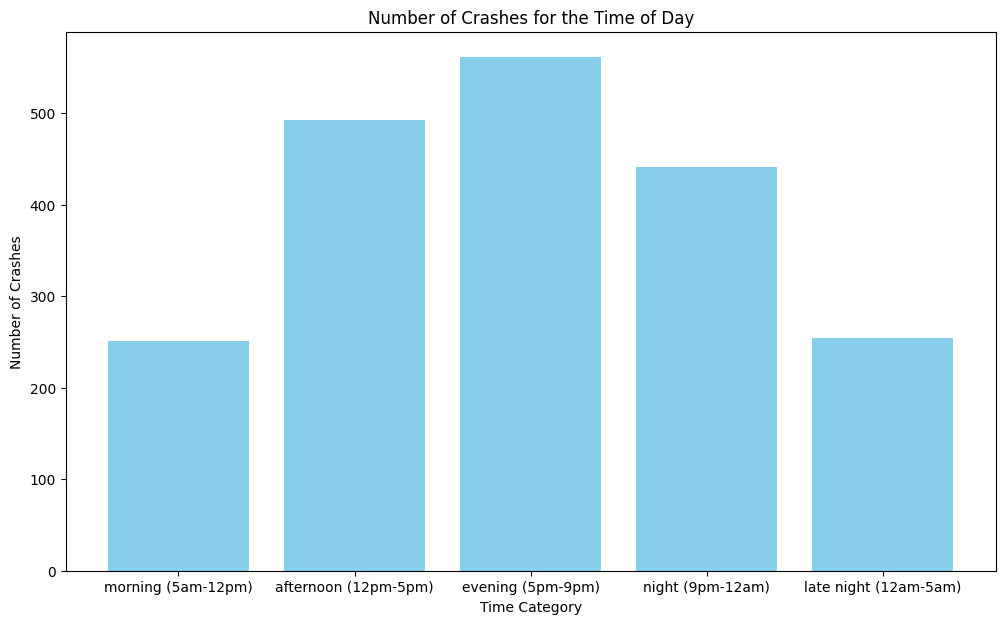

In [561]:
crash_time_category_count = data['crash_time_category'].value_counts()

crash_time_category_count = crash_time_category_count.sort_index()

plt.figure(figsize=(12, 7))

plt.bar(crash_time_category_count.index, crash_time_category_count.values, color='skyblue')

plt.title('Number of Crashes for the Time of Day')
plt.xlabel('Time Category')
plt.ylabel('Number of Crashes')


plt.show()

Which borough has the most car accidents?

In [562]:
data.columns

Index(['crash_date', 'crash_time', 'on_street_name', 'off_street_name',
       'persons_injured', 'persons_killed', 'pedestrians_injured',
       'pedestrians_killed', 'cyclist_injured', 'cyclist_killed',
       'motorist_injured', 'motorist_killed', 'contributing_factor_vehicle_1',
       'contributing_factor_vehicle_2', 'collision_id', 'vehicle_type_code_1',
       'vehicle_type_code_2', 'borough', 'zip_code', 'latitude', 'longitude',
       'location', 'crash_time_category'],
      dtype='object')

In [563]:
data['borough'].value_counts()

borough
BROOKLYN         461
QUEENS           344
BRONX            227
MANHATTAN        211
STATEN ISLAND     57
Name: count, dtype: int64

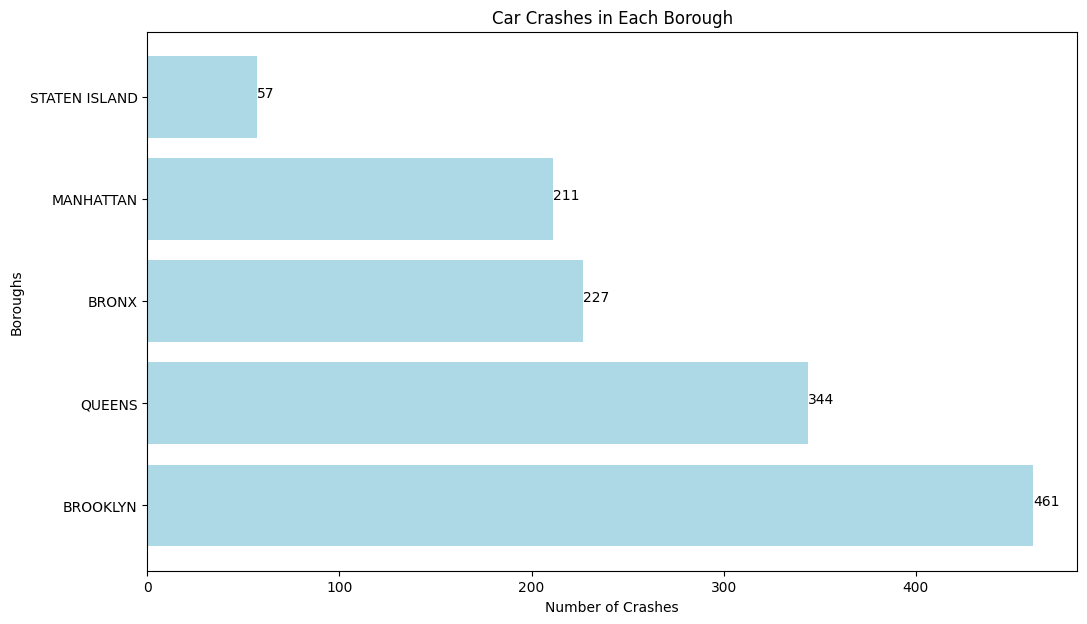

In [564]:
boroughs = data['borough'].value_counts()

plt.figure(figsize=(12, 7))

plt.barh(boroughs.index, boroughs.values, color='lightblue')

for index, value in enumerate(boroughs.values):
    plt.text(value, index, str(value))

plt.title('Car Crashes in Each Borough')
plt.xlabel('Number of Crashes')
plt.ylabel('Boroughs')


plt.show()

What is the time of year with most car crashes?